In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('supply_chain_data.csv')

In [3]:
print(df.head())

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

In [4]:
print(df.describe())

            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0

In [46]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

### Relationship between the price of the products and the revenue generated by them

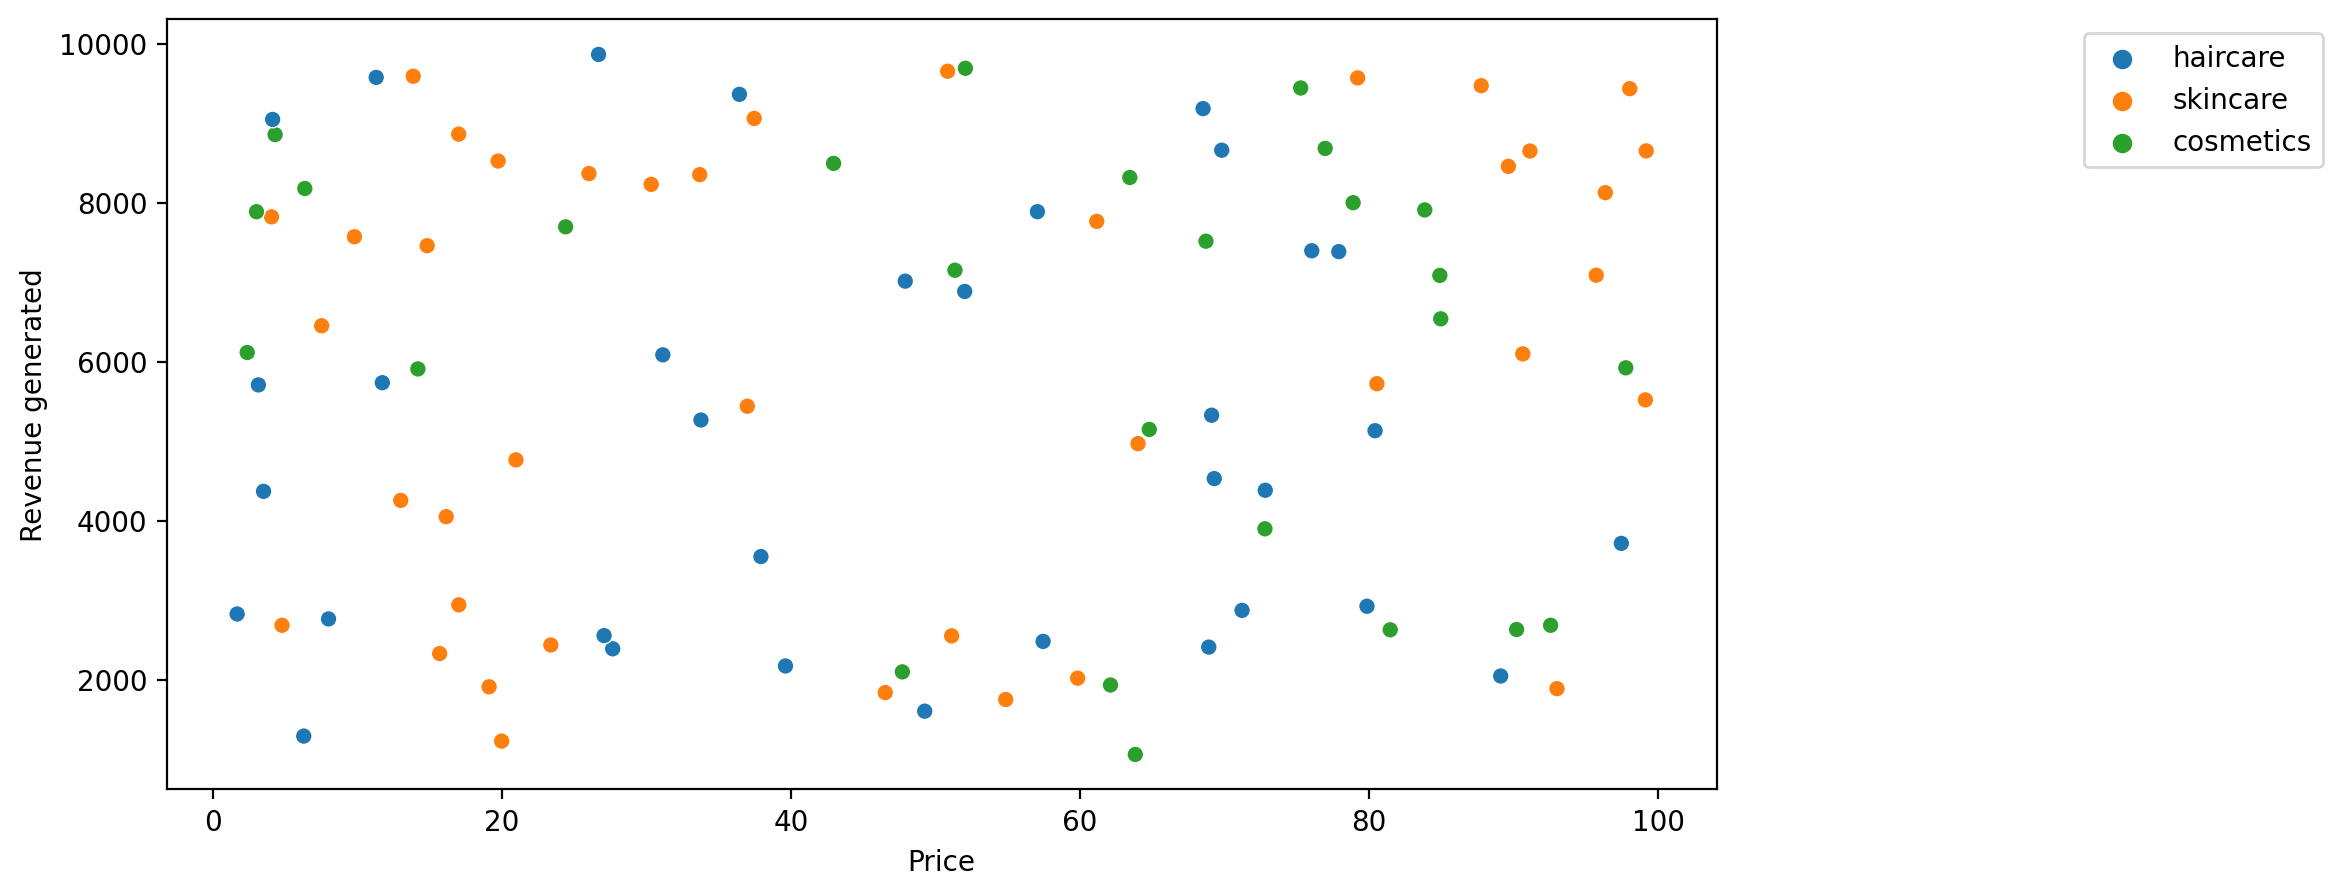

In [5]:
plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(data=df,x='Price',y='Revenue generated',hue='Product type')
plt.legend(bbox_to_anchor=(0.5, 0.5, 0.9, 0.5))

### CONCLUSION FOR THE ABOVE VISUALIZATION

The company drives more revenue from the skincare products, higher the price of the skincare the more revenue they generate.

### Sales by product type

In [6]:
sales = df.groupby('Product type')['Number of products sold'].sum().reset_index()

In [7]:
labels = sales['Product type']

In [8]:
sizes = sales['Number of products sold']

In [9]:
sales.head()

,Product type,Number of products sold
0,cosmetics,11757
1,haircare,13611
2,skincare,20731


([<matplotlib.patches.Wedge at 0x240422826d0>,
 [Text(-1.0941595630873364, -0.11320269654265828, 'cosmetics'),
  Text(0.2839547672804853, -1.062718067099024, 'haircare'),
  Text(0.5656708198140948, 0.9434068706612487, 'skincare')],
 [Text(-0.5968143071385471, -0.06174692538690451, '25.5%'),
  Text(0.15488441851662835, -0.5796644002358312, '29.5%'),
  Text(0.30854771989859714, 0.5145855658152265, '45.0%')])

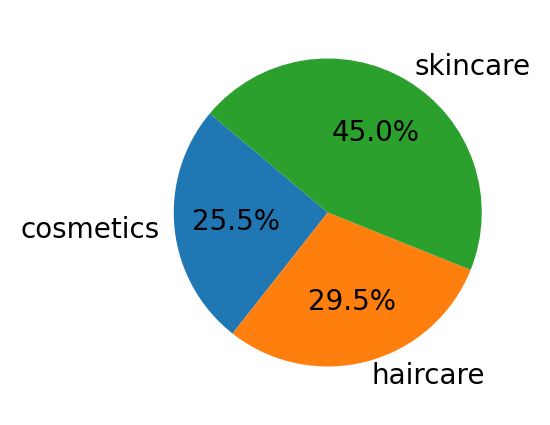

In [10]:
plt.figure(figsize=(2.5,2.5),dpi=200)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', startangle=140)

### CONCLUSION FOR THE ABOVE VISUALIZATION

So 45% of the business comes from skincare products, 29.5% from haircare, and 25.5% from cosmetics.

### Total revenue generated from shipping carriers

In [12]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [13]:
total_revenue = df.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()

In [17]:
total_revenue

,Shipping carriers,Revenue generated
0,Carrier A,142629.994607
1,Carrier B,250094.646988
2,Carrier C,184880.177143


<Axes: title={'center': 'Total revenue generated from shipping carriers'}, xlabel='Shipping carriers', ylabel='Revenue generated'>

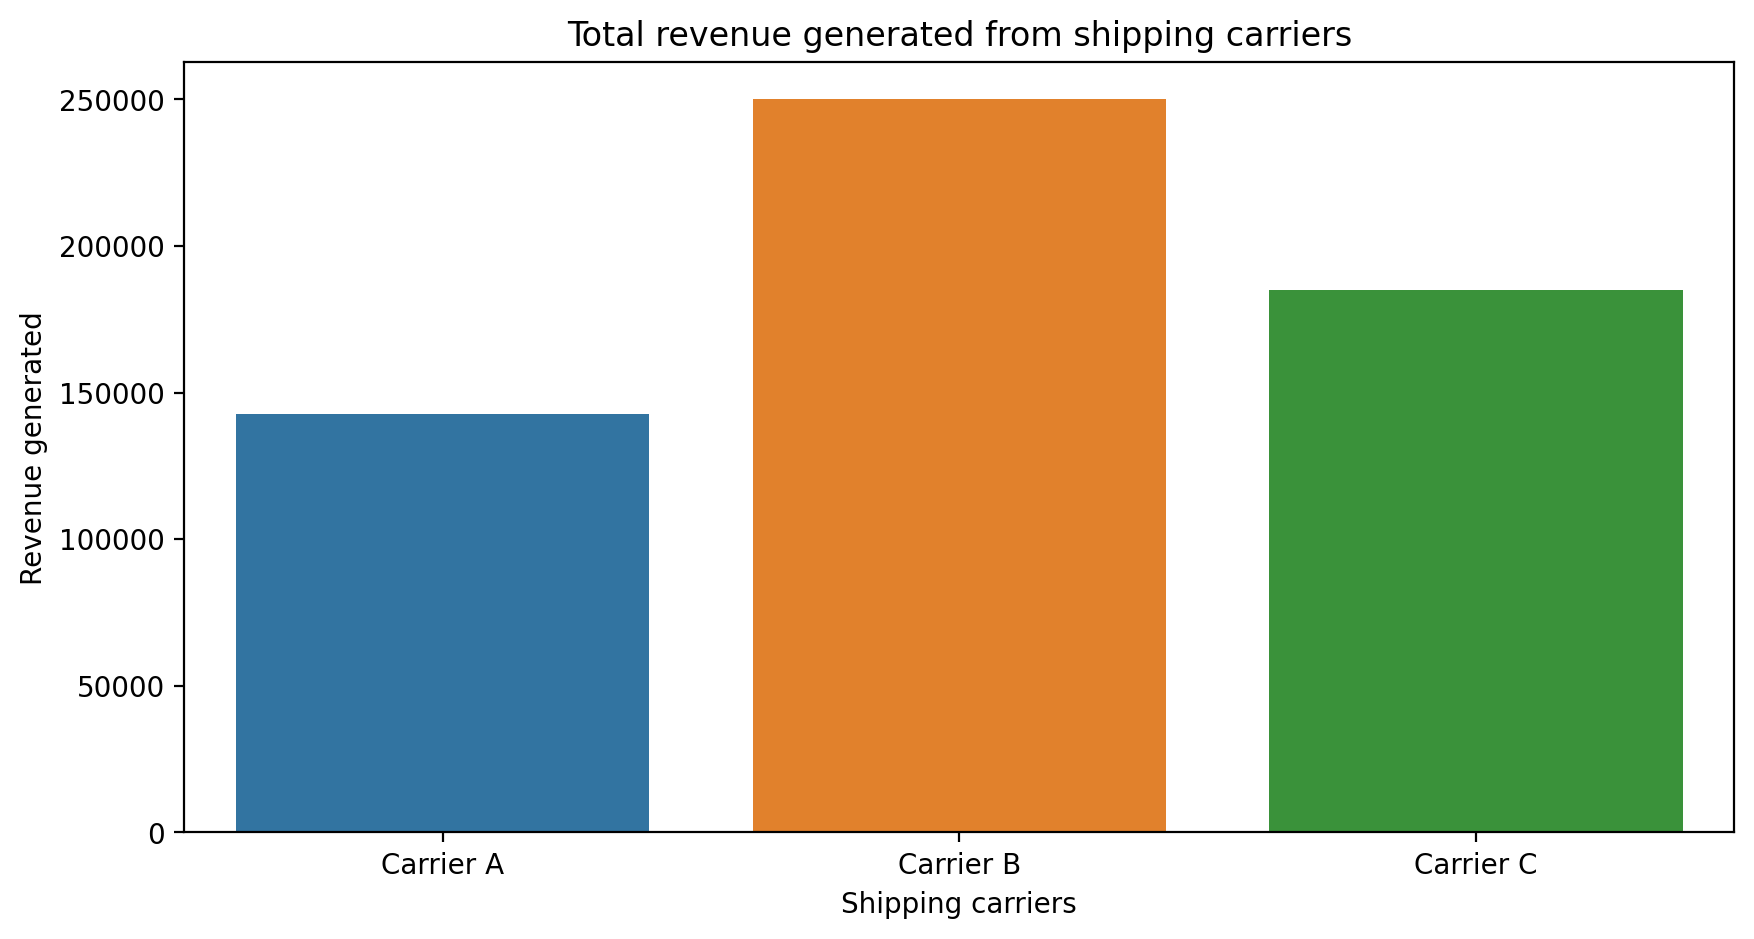

In [41]:
plt.figure(figsize=(10,5),dpi=200)
plt.title('Total revenue generated from shipping carriers')
sns.barplot(x=total_revenue['Shipping carriers'], y=total_revenue['Revenue generated'])

### CONCLUSION FOR THE ABOVE VISUALIZATION

Carrier B helps the company in generating more revenue.

### Average lead time and Average Manufacturing Costs for all products of the company

In [48]:
average_lead_time = df.groupby('Product type')['Lead time'].mean().reset_index()
average_lead_time

,Product type,Lead time
0,cosmetics,13.538462
1,haircare,18.705882
2,skincare,18.000000


In [50]:
average_manufacturing_costs = df.groupby('Product type')['Manufacturing costs'].mean().reset_index()
average_manufacturing_costs

,Product type,Manufacturing costs
0,cosmetics,43.052740
1,haircare,48.457993
2,skincare,48.993157


In [52]:
result = pd.merge(average_lead_time,average_manufacturing_costs,on='Product type')
result

,Product type,Lead time,Manufacturing costs
0,cosmetics,13.538462,43.052740
1,haircare,18.705882,48.457993
2,skincare,18.000000,48.993157


In [56]:
result.rename(columns={'Lead time': 'Average Lead Time', 'Manufacturing costs': 'Average Manufacturing Costs'}, inplace=True)
print(result)

  Product type  Average Lead Time  Average Manufacturing Costs
0    cosmetics          13.538462                    43.052740
1     haircare          18.705882                    48.457993
2     skincare          18.000000                    48.993157


<Axes: xlabel='Product type', ylabel='Average Lead Time'>

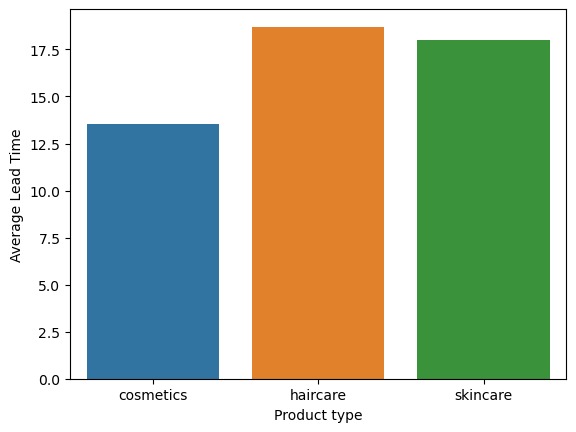

In [61]:
sns.barplot(x='Product type',y='Average Lead Time',data=result)

<Axes: xlabel='Product type', ylabel='Average Manufacturing Costs'>

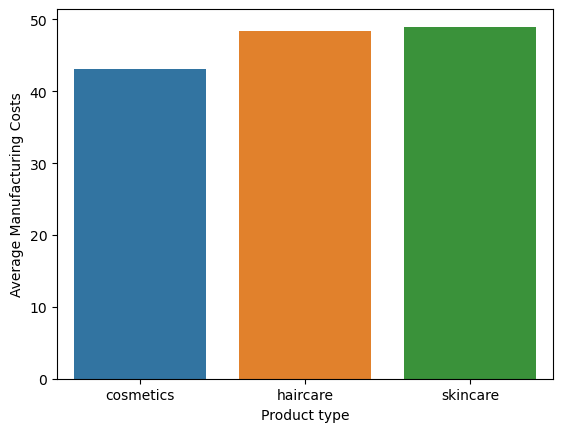

In [62]:
sns.barplot(x='Product type',y='Average Manufacturing Costs',data=result)

### Analyzing SKU

### SKU V/S Revenue Generated

<Axes: xlabel='SKU', ylabel='Revenue generated'>

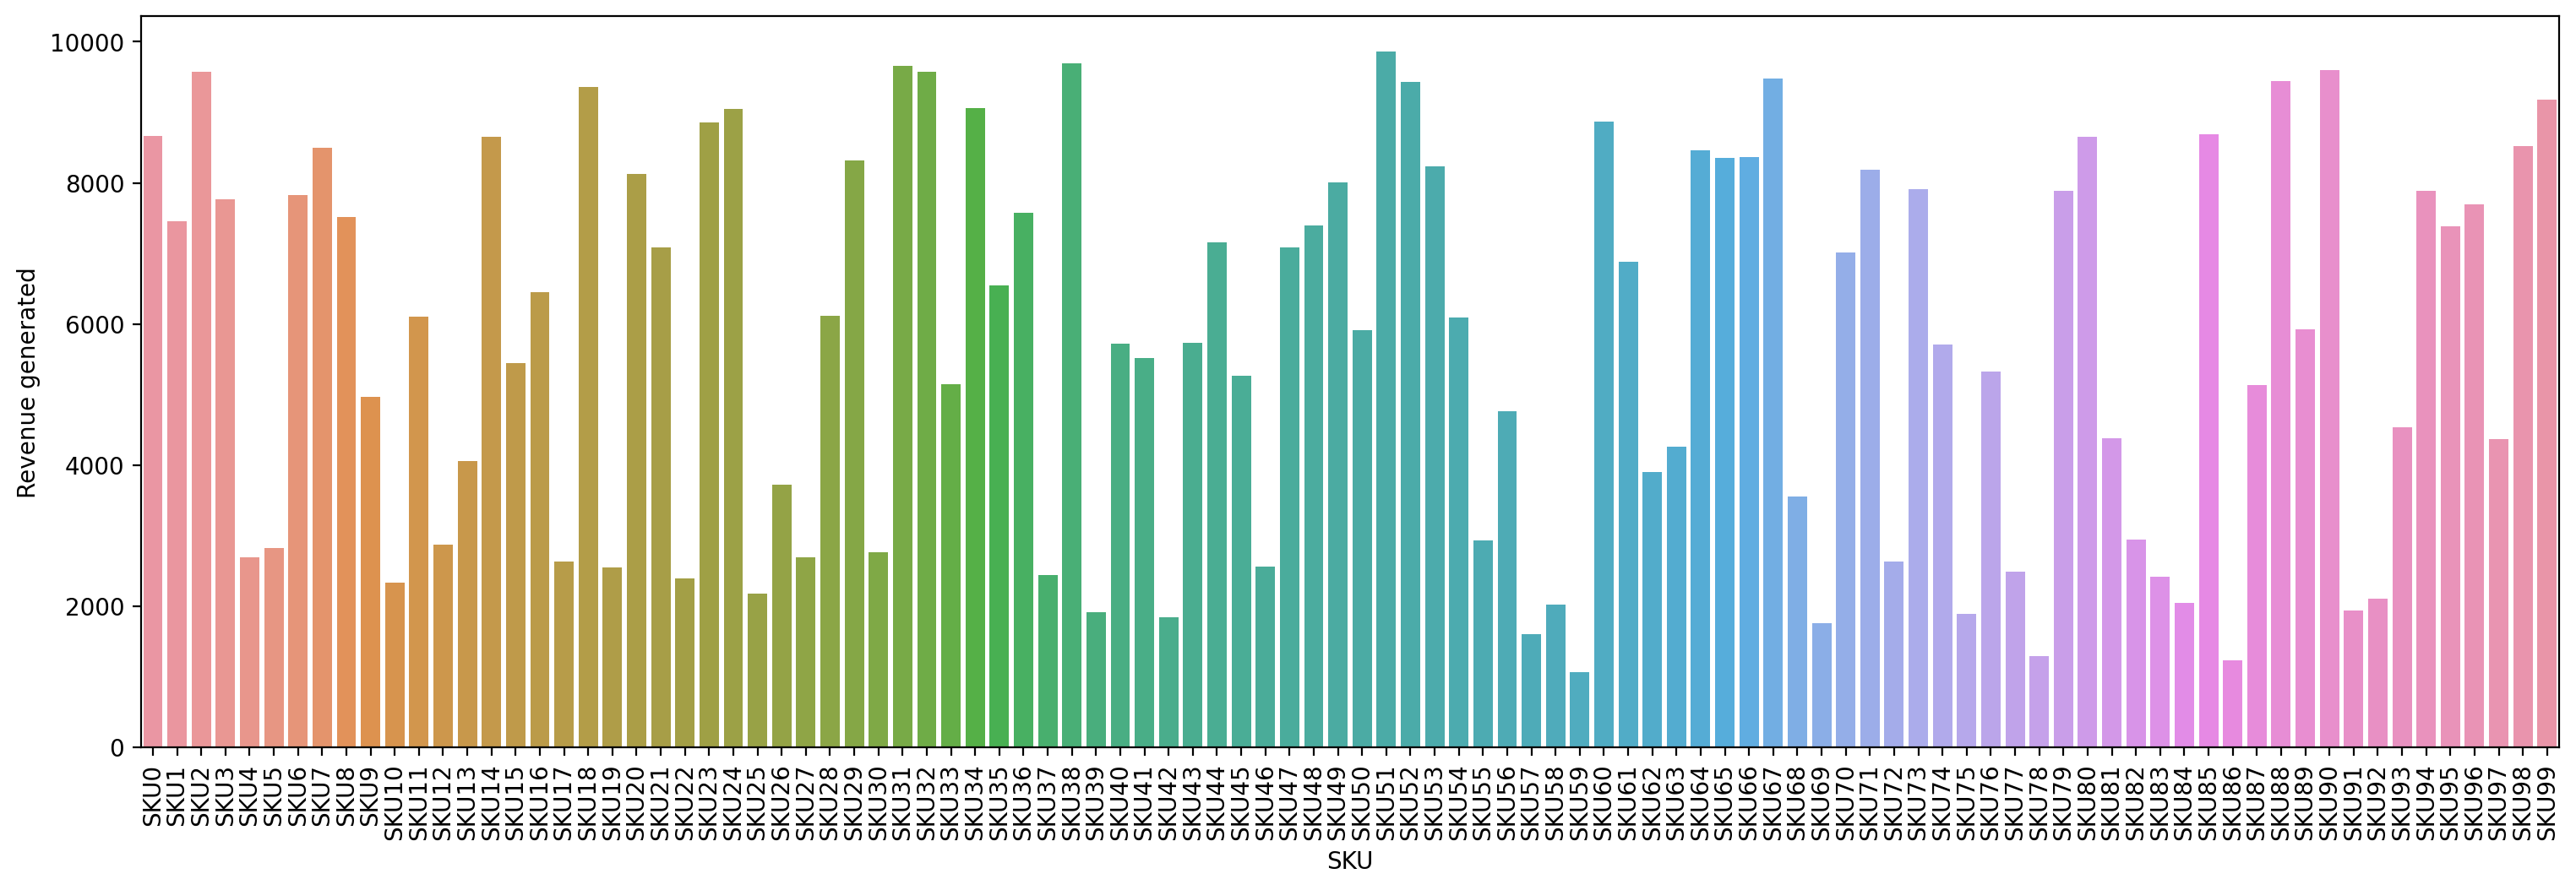

In [78]:
plt.figure(figsize=(15,5),dpi=200)
plt.xticks(rotation=90)  # Rotate labels by 45 degrees
plt.tight_layout() 
sns.barplot(data=df,y='Revenue generated',x='SKU')

### Analyzing the stock levels

<Axes: xlabel='SKU', ylabel='Stock levels'>

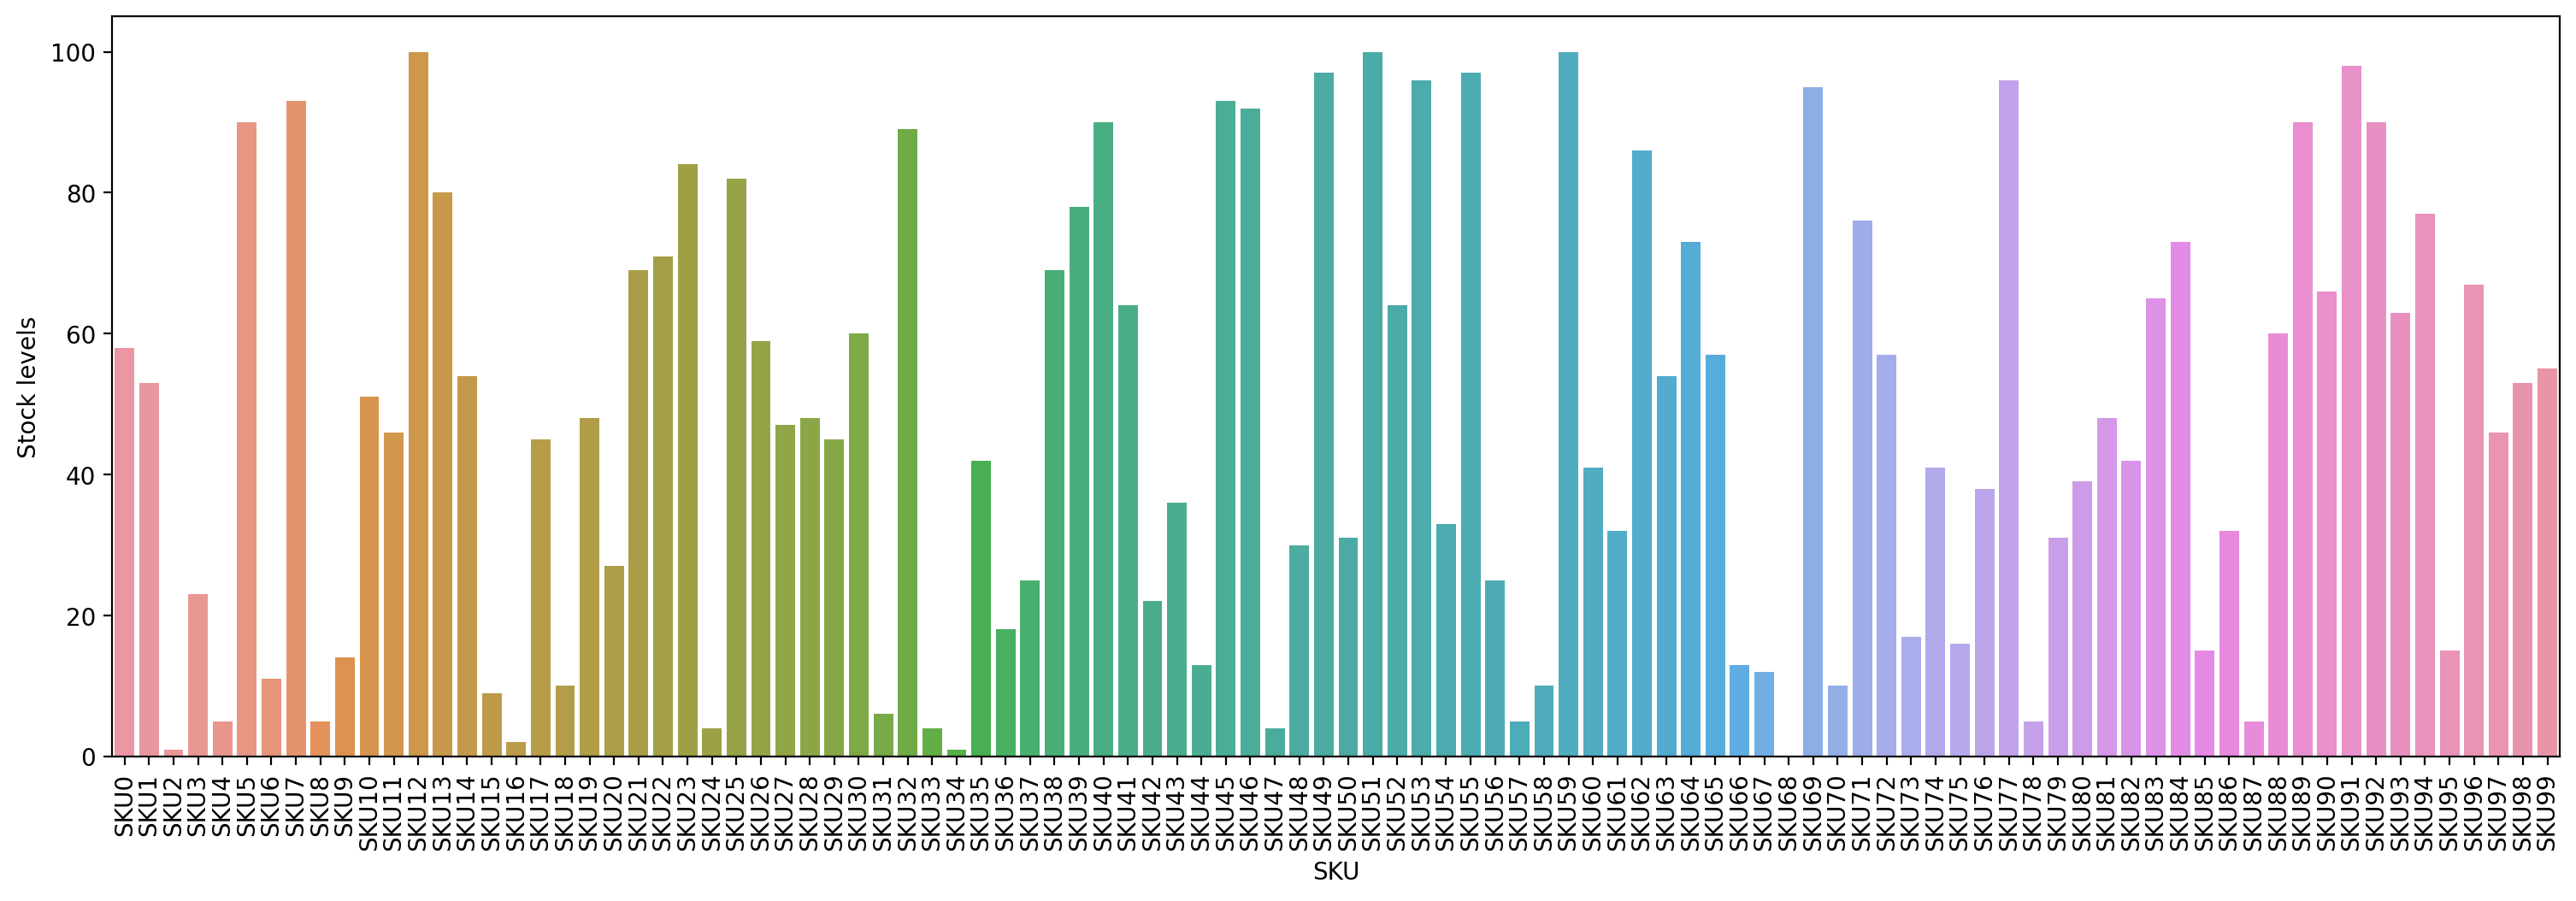

In [71]:
plt.figure(figsize=(15,5),dpi=200)
plt.xticks(rotation=90)  # Rotate labels by 45 degrees
plt.tight_layout() 
sns.barplot(data=df,y='Stock levels',x='SKU')

<Axes: xlabel='SKU', ylabel='Order quantities'>

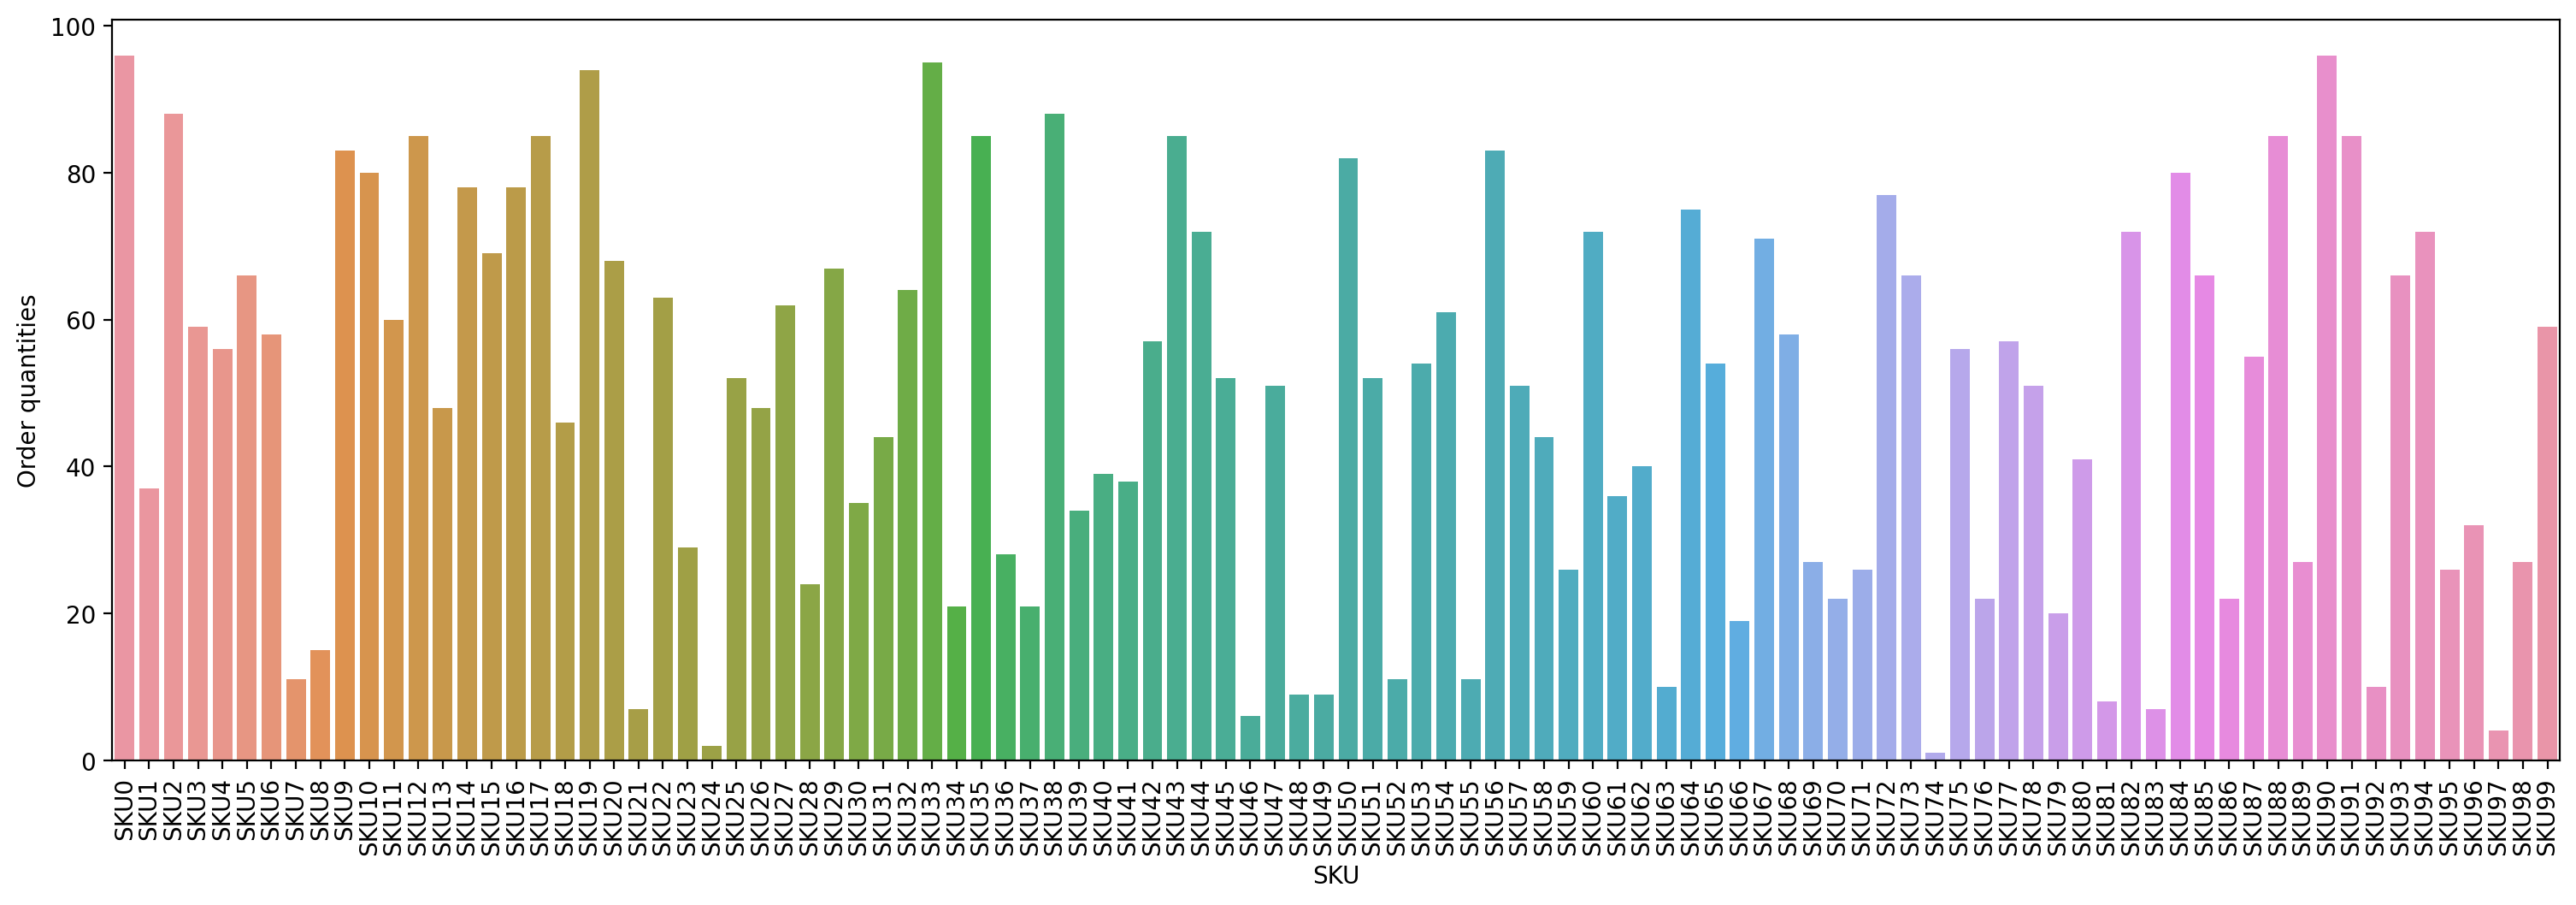

In [79]:
plt.figure(figsize=(15,5),dpi=200)
plt.xticks(rotation=90)  # Rotate labels by 45 degrees
plt.tight_layout() 
sns.barplot(data=df,y='Order quantities',x='SKU')

<Axes: xlabel='Shipping carriers', ylabel='Shipping costs'>

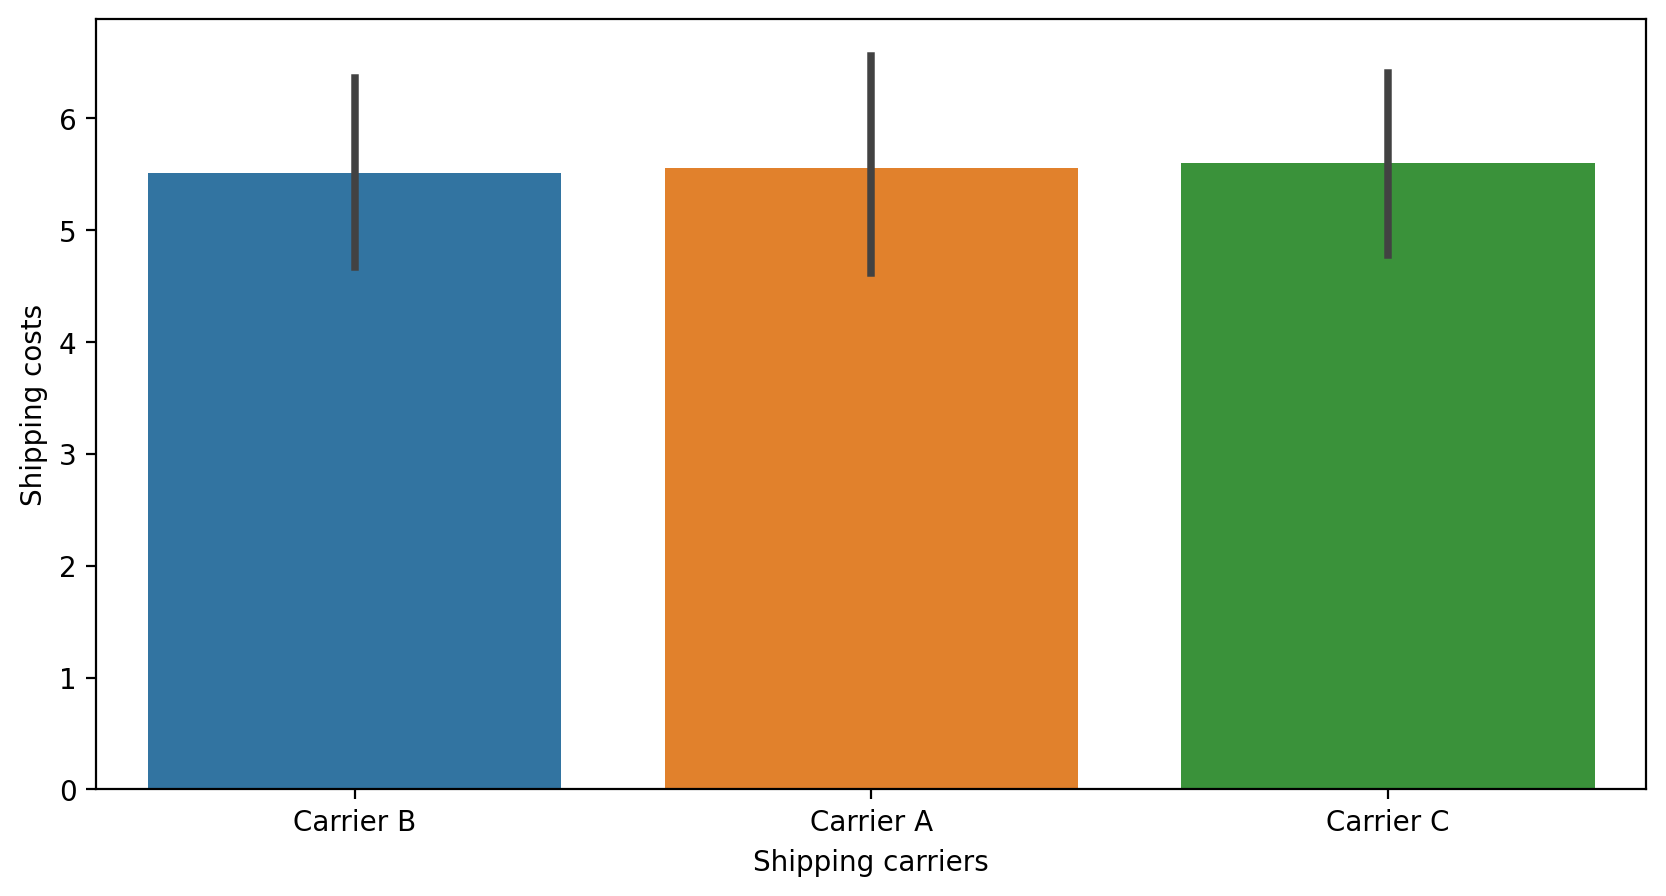

In [86]:
plt.figure(figsize=(10,5),dpi=200)
sns.barplot(data=df,x='Shipping carriers',y='Shipping costs')

### CONCLUSION FOR THE ABOVE VISUALIZATION

Carrier B helps the company in more revenue. It is also the most costly Carrier among the three. 

### Cost distribution by transportation mode

In [90]:
df['Transportation modes'].value_counts()

Transportation modes
Road    29
Rail    28
Air     26
Sea     17
Name: count, dtype: int64

<Axes: xlabel='Transportation modes', ylabel='Costs'>

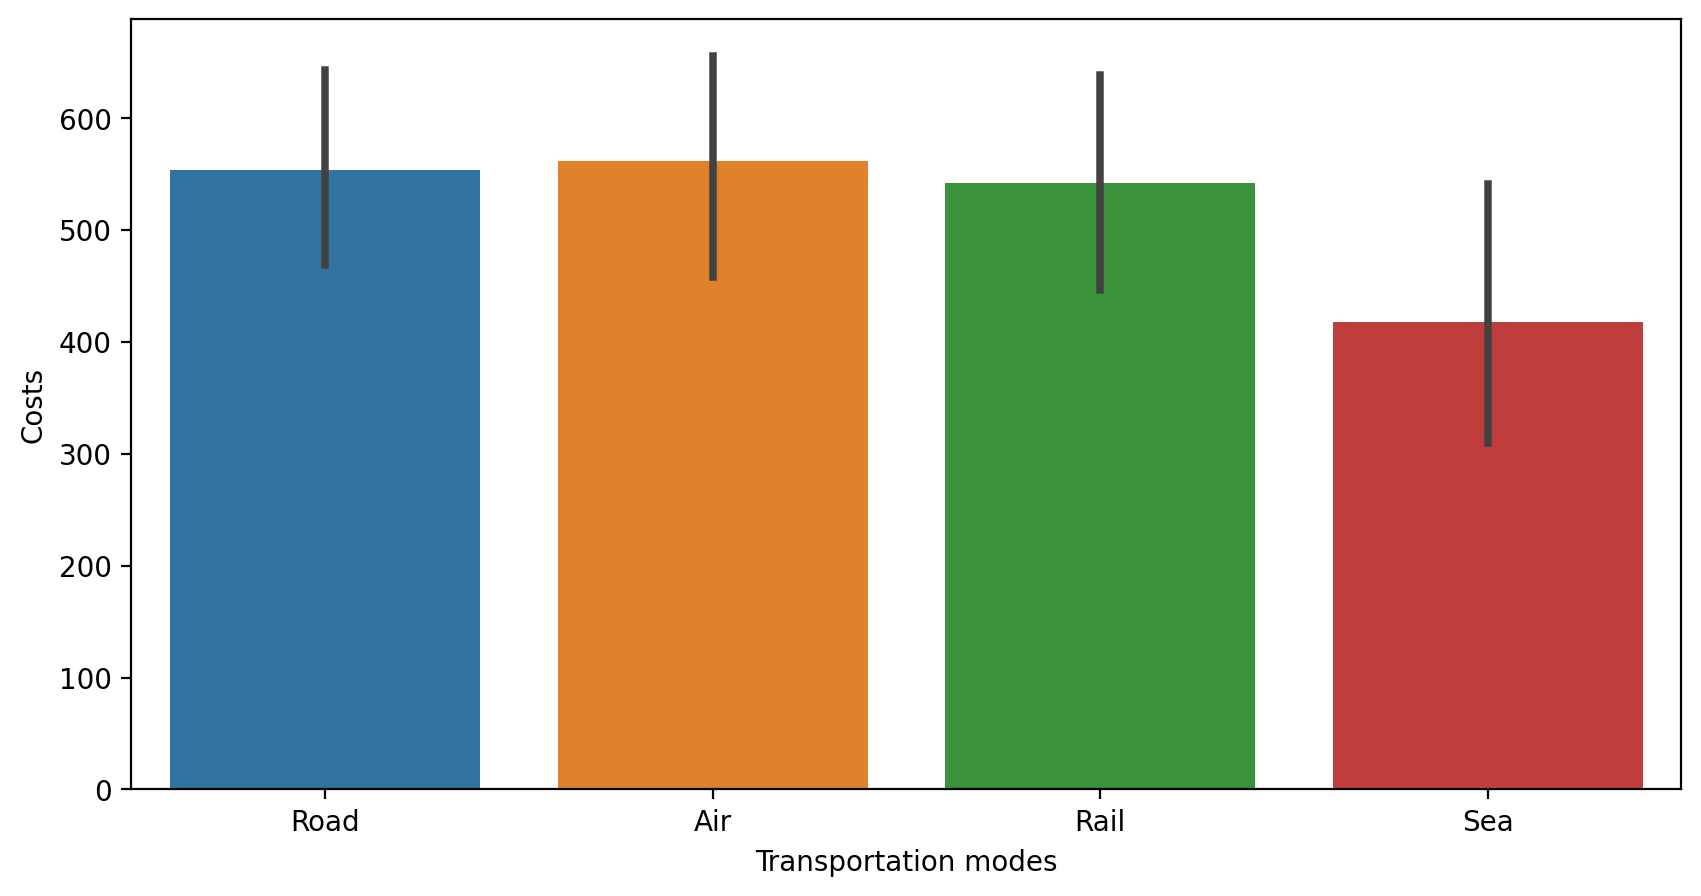

In [91]:
plt.figure(figsize=(10,5),dpi=200)
sns.barplot(data=df,x='Transportation modes',y='Costs')

In [107]:
costs = df.groupby('Transportation modes')['Costs'].sum().reset_index()

In [108]:
label = costs['Transportation modes']

In [109]:
size = costs['Costs']

([<matplotlib.patches.Wedge at 0x2406599bd10>,
 [Text(-1.0843675978973946, -0.1847888325365864, 'Air'),
  Text(0.3929941313098669, -1.027402361665576, 'Rail'),
  Text(0.877296205321942, 0.6635897589081082, 'Road'),
  Text(-0.4794881653561794, 0.9899955046783623, 'Sea')],
 [Text(-0.5914732352167607, -0.10079390865631985, '27.6%'),
  Text(0.21436043525992737, -0.5604012881812233, '28.7%'),
  Text(0.47852520290287737, 0.3619580503135136, '30.3%'),
  Text(-0.2615389992851887, 0.5399975480063793, '13.4%')])

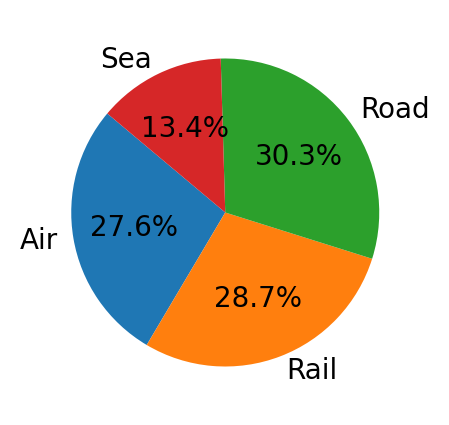

In [112]:
plt.figure(figsize=(2.5,2.5),dpi=200)
plt.pie(size,labels=label,autopct='%1.1f%%', startangle=140)

### Analyzing Detect rates

In [121]:
defect_rates_by_product = df.groupby('Product type')['Defect rates'].mean().reset_index()

<Axes: title={'center': 'Average defect rates by product'}, xlabel='Product type', ylabel='Defect rates'>

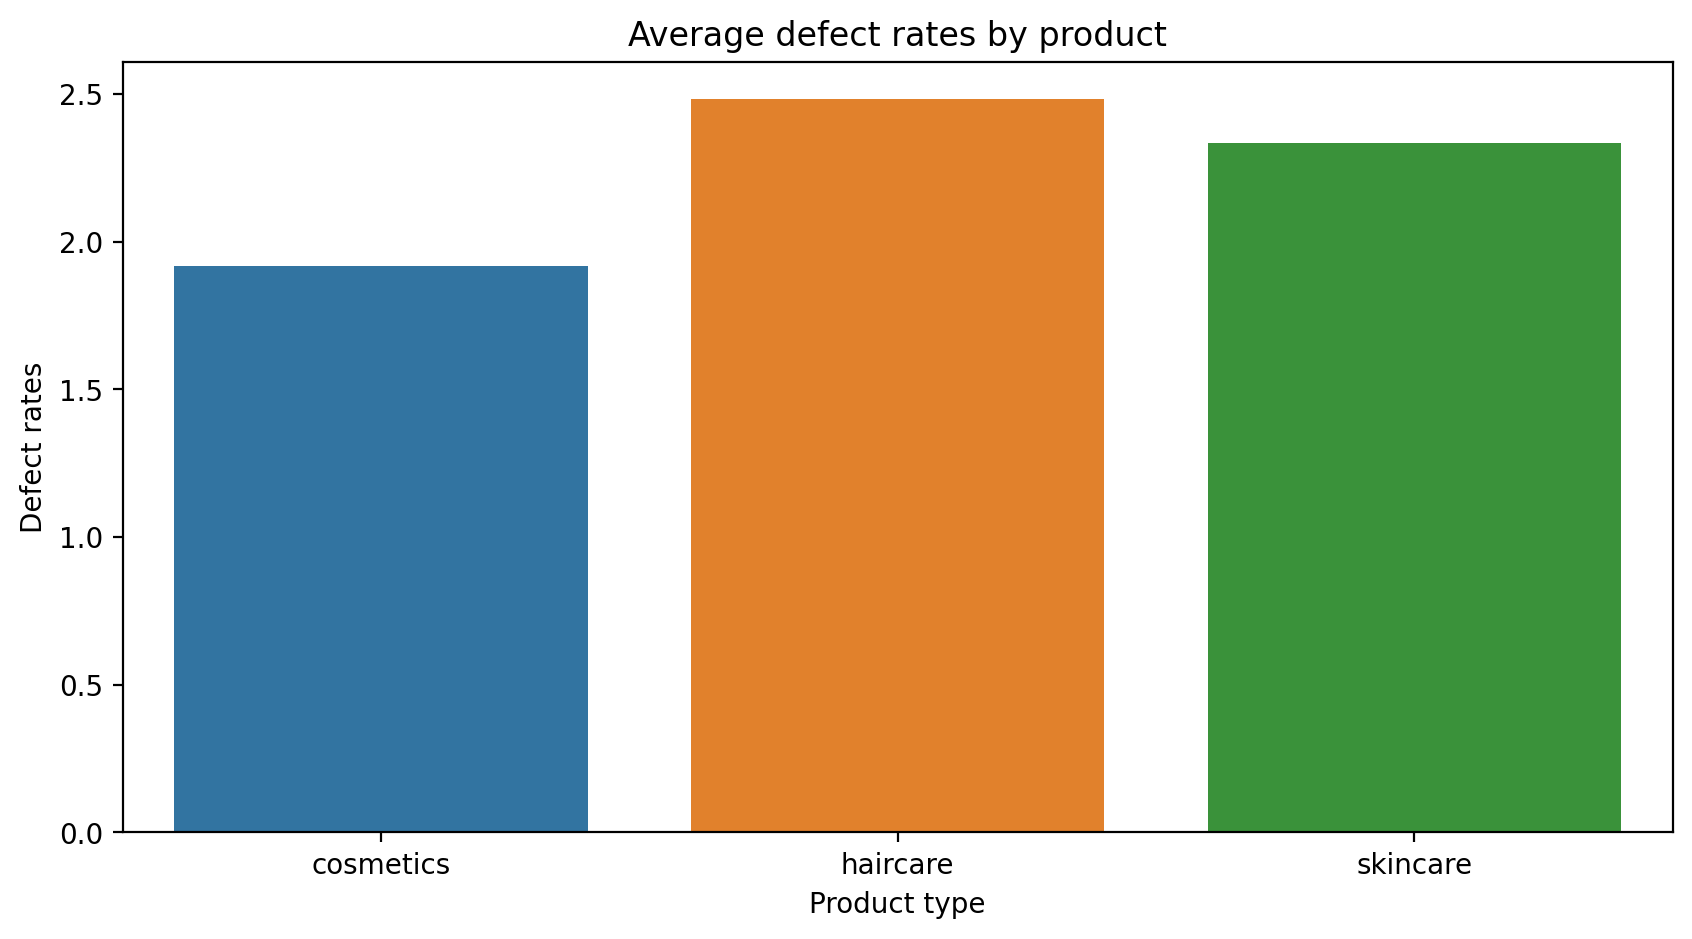

In [122]:
plt.figure(figsize=(10,5),dpi=200)
plt.title('Average defect rates by product')
sns.barplot(x=defect_rates_by_product['Product type'],y=defect_rates_by_product['Defect rates'])

### CONCLUSION FOR THE ABOVE VISUALIZATION

Defect rates of haircare is higher

In [125]:
pivot_table = pd.pivot_table(df, values='Defect rates', 
                             index=['Transportation modes'], 
                             aggfunc='mean')

pivot_table

,Defect rates
Transportation modes,
Air,1.823924
Rail,2.318814
Road,2.620938
Sea,2.315281


In [126]:
defect_rates = df.groupby('Transportation modes')['Defect rates'].mean().reset_index()

In [127]:
labels = defect_rates['Transportation modes']

In [128]:
sizes = defect_rates['Defect rates']

([<matplotlib.patches.Wedge at 0x24068e2f1d0>,
 [Text(-0.888095736866625, -0.6490654529085078, 'Air'),
  Text(0.5214195546325228, -0.968566801024494, 'Rail'),
  Text(0.887301600949564, 0.6501506509666362, 'Road'),
  Text(-0.7654640750573909, 0.7899776894296023, 'Sea')],
 [Text(-0.4844158564727045, -0.3540357015864588, '20.1%'),
  Text(0.2844106661631942, -0.5283091641951785, '25.5%'),
  Text(0.4839826914270349, 0.35462762779998336, '28.9%'),
  Text(-0.4175258591222132, 0.4308969215070558, '25.5%')])

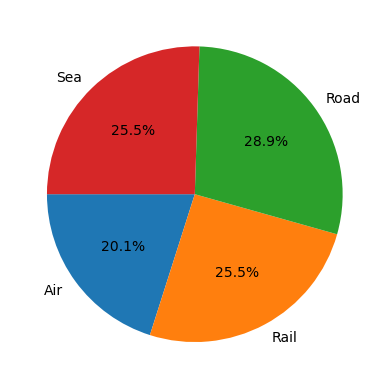

In [131]:
plt.pie(sizes,labels=labels,autopct='%1.1f%%', startangle=180)

### CONCLUSION FOR THE ABOVE VISUALIZATION

Road transportation results in a higher defect rate, and Air transportation has the lowest defect rate.